( Projet Eleves --> Correction / ce qui est attendu )
<H1>Mesures empririques des temps de calcul d'algorithmes de tri :</H1>
<H2>Comparaison avec les résultats théoriques.</H2>

<u>Intro :</u>    ...

<u>Contenu :</u>
<li><span><a href="#-I-Le-tri-bulle-:-" data-toc-modified-id="-Le-tri-bulle-"><span class="toc-item-num">1&nbsp;&nbsp;</span> Le tri bulle </a></span></li>
<li><span><a href="#-II-Le-tri-sélection-:-" data-toc-modified-id="-Le-tri-sélection-"><span class="toc-item-num">2&nbsp;&nbsp;</span> Le tri sélection </a></span></li>
<li><span><a href="#-III-Le-tri-rapide-(non-récursif)-:-" data-toc-modified-id="-Le-tri-rapide-(non-récursif)-"><span class="toc-item-num">3&nbsp;&nbsp;</span> Le tri rapide (non récursif) </a></span></li>

<li><span><a href="#-IV-Le-tri-natif-de-python-:-" data-toc-modified-id="-Le-tri-natif-de-python-"><span class="toc-item-num">4&nbsp;&nbsp;</span> Le tri natif de python </a></span></li>
<li><span><a href="#-V-Comparaison-des-différents-tris-:-" data-toc-modified-id="-Comparaison-des-différents-tris-"><span class="toc-item-num">5&nbsp;&nbsp;</span> Comparaison des différents tris </a></span></li>



<u><h2> I Le tri bulle : </h2></u>
<u><b>Principe : </b></u><br/>
Le tri à bulles compare, deux à deux (soit une bulle), les éléments e1 et e2 consécutifs d'un tableau et effectue, en balayant le tableau, une permutation si e1 > e2.<br/>
Les balayages du tableau se renouvellent (sur le tableau de borne supérieure réduite à chaque balayage : (complexité (n-Nb_balayage)  ) jusqu'à ce qu'il n'y ait eu aucune permutation nécessaire dans le balayage en cours.<br/>
<u><b>Complexité : </b></u><br/>
La complexité du 1er  balayage est de : n-1<br/>
La complexité du 2ème balayage est de : n-2<br/>
La complexité du 3ème balayage est de : n-3<br/>
...<br/>
La complexité de l'avant avant dernier balayage est de : n-(n-2) = 2<br/>
La complexité de l'avant dernier balayage est de : n-(n-1) = 1<br/>
La complexité du dernier balayage est de : n-n = 0<br/>
---> La complexité totale est la somme de ces complexités, soit :<br/>
C=0+1+2+...+(n-2)+(n-1)+n ==> D'où : la complexité est la somme des n entiers = [n (n-1 )] / 2<br/>
<u><b>Complexité dans le pire cas : </b></u><br/>
Dans le pire des cas,le tableau est déjà classé à l'envers : il faudra, non seulement, pour chaque balayage, inverser chaque bulle, mais aussi, réaliser tous les balayages à borne supérieure décroissante possible :<br/>
la complexité sera en O(n²).<br/>
<u><b>Complexité dans le cas facile : </b></u><br/>
Dans le meilleur cas, le tableau est déjà classé, et le script ne réalise qu'un seul balayage de complexité (n-1) : <br/>
la complexité sera en O(n).<br/>
<u><b>Explication des jeux de tests présents dans le script : </b></u><br/>
1) un test de precondition : Tous les éléments du tableau doivent être des nombres<br/>
2) un test de postcondition : Le tableau final doit être trié<br/>
...<br/>
<u><b>Script : </b></u><br/>
<u>Référence : </u> http://lwh.free.fr/pages/algo/tri/tri_bulle.html <br/>

In [1]:
def tri_bulle(tableau,Nb_Action_atom):
    longueur_tab=len(tableau)
    for k in range(longueur_tab):
        element=tableau[k]
        typ_element=type(element)
        assert(typ_element!=str),"Tous les éléments du tableau doivent être des nombres" # Pré-condition
    #assert(type(tableau[k] for k in range(longueur_tab)) == int),"Tous les éléments du tableau doivent être des nombres entiers" # Pré-condition
    permutation = True    
    passage = 0
    while permutation == True:
        Nb_Action_atom=Nb_Action_atom+1
        permutation = False
        passage = passage + 1
        for en_cours in range(0, len(tableau) - passage):
            Nb_Action_atom=Nb_Action_atom+1
            if tableau[en_cours] > tableau[en_cours + 1]:
                Nb_Action_atom=Nb_Action_atom+1
                permutation = True
                # On echange les deux elements
                tableau[en_cours], tableau[en_cours + 1] = tableau[en_cours + 1],tableau[en_cours]
    return tableau,Nb_Action_atom
    
Nb_Action_atom=0
liste_initiale=[12,4,7,20,3,9]
print("\nvoici la liste : ",liste_initiale)
liste_triee,Nb_Action_atom=tri_bulle(liste_initiale,Nb_Action_atom)

for k in range(len(liste_triee)-1):
    i,j=liste_triee[k],liste_triee[k+1]
    assert(i<j),"Au final, le tableau doit être trié" # Post-condition

print("\nvoici la même liste triée: ",liste_triee)
print("\nNombre d'action atomique effectuées : ",Nb_Action_atom)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
from timeit import default_timer as timer 
def create_plot(ptype,temps_moy,taille,carres,Nb_Action,sigmo):
    x = taille
    if ptype == 'temps_empirique':
        y = temps_moy
    if ptype == 'quadratique':
        y = carres
    if ptype == 'lineaire':
        y = x
    if ptype == 'sigmoide':
        y = sigmo
    elif ptype == 'comptage_theorique':
        y = Nb_Action
    return(x, y)

def Triage_et_stats(propriete, tri_souhaite):
    liste_temps=[]
    temps_moy=[]
    taille=[]
    Nb_Action=[]
    carres=[]
    sigmo=[]
    for taille_tab in range(2,1000,100):
        Nb_Action_atom=0
        Nb_Action_atom = Nb_Action_atom+1
        for Nb_essai in range(10):
            Nb_Action_atom = Nb_Action_atom+1
            tableau=random.sample(range(taille_tab*10),taille_tab)
            if propriete=="melange":
                random.shuffle(tableau)
            elif propriete=="croissant":
                tableau.sort()
            elif propriete=="decroissant":
                tableau.sort(reverse=True)           

            start = timer()
            if tri_souhaite=="bulle":
                tableau,Nb_Action_atom=tri_bulle(tableau,Nb_Action_atom)
            elif tri_souhaite=="selection":
                tableau,Nb_Action_atom=tri_selection(tableau,Nb_Action_atom)
            elif tri_souhaite=="natif_python":
                tableau,Nb_Action_atom=tri_natif_python(tableau,Nb_Action_atom)
            elif tri_souhaite=="rapide":
                Longueur_tab=len(tableau)
                tableau,Nb_Action_atom=quickSortIterative(tableau,0,Longueur_tab-1,Nb_Action_atom)
             
            end = timer()
            temps=(end - start)
            liste_temps.append(temps)
        somme=sum(liste_temps)
        moyenne=somme/10
        temps_moy.append(moyenne)
        taille.append(taille_tab)
        carres.append(taille_tab**2)
        sigmo.append(1/(1+np.exp(-(taille_tab))))
        Nb_Action.append(Nb_Action_atom)
        Der_Nb_Action_atom=Nb_Action_atom
        Der_temps=moyenne
    return temps_moy,taille,carres,Nb_Action,sigmo,Der_Nb_Action_atom,Der_temps

def graph(propriete,modele,temps_moy,taille,carres,Nb_Action,sigmo):
    if modele=="lineaire": 
        ylabel_modele="y = x"
    if modele=="sigmoide": 
        ylabel_modele="y = 1 / (1+e-x) : sygmoïde"
    elif modele=="quadratique":
        ylabel_modele="y = x²"
    if propriete=="melange":
        titre="tableaux aléatoires mélangés :"
    elif propriete=="croissant":
        titre="tableaux aléatoires triés de façon croissante :"
    elif propriete=="decroissant":
        titre="tableaux aléatoires triés de façon décroissante :"
        
    fig = plt.figure(figsize=(12, 4))
    fig.suptitle(titre, fontsize=16)
    plt.subplot(1, 3, 1)
    x, y = create_plot('temps_empirique',temps_moy,taille,carres,Nb_Action,sigmo)
    plt.plot(x, y, marker='+', color ='r')
    #plt.title('A tale of 2 subplots')
    plt.ylabel('Temps moyens (s)')
    plt.xlabel('Taille du tableau')

    plt.subplot(1, 3, 2)
    x, y = create_plot('comptage_theorique',temps_moy,taille,carres,Nb_Action,sigmo)
    plt.plot(x, y,  color ='b')
    plt.ylabel('Nombre d\'actions atomiques')
    plt.xlabel('Taille du tableau')

    plt.subplot(1, 3, 3)
    x, y = create_plot(modele,temps_moy,taille,carres,Nb_Action,sigmo)
    plt.plot(x, y,  color ='r')
    plt.ylabel(ylabel_modele)
    plt.xlabel('Taille du tableau')
    fig.subplots_adjust(wspace=1.1)
#######################################################################
def resultats(tri_souhaite,propriete1,modele1,propriete2,modele2,propriete3,modele3):
    temps_moy,taille,carres,Nb_Action,sigmo,Mel_Der_Nb_Action_atom,Mel_Der_temps=Triage_et_stats(propriete1,tri_souhaite)    
    graph(propriete1,modele1,temps_moy,taille,carres,Nb_Action,sigmo)
    ###############
    temps_moy,taille,carres,Nb_Action,sigmo,Croiss_Der_Nb_Action_atom,Croiss_Der_temps=Triage_et_stats(propriete2,tri_souhaite)    
    graph(propriete2,modele2,temps_moy,taille,carres,Nb_Action,sigmo)
    ###############
    temps_moy,taille,carres,Nb_Action,sigmo,Decroiss_Der_Nb_Action_atom,Decroiss_Der_temps=Triage_et_stats(propriete3,tri_souhaite)    
    graph(propriete3,modele3,temps_moy,taille,carres,Nb_Action,sigmo)
    ###############
    return Mel_Der_Nb_Action_atom,Croiss_Der_Nb_Action_atom,Decroiss_Der_Nb_Action_atom,\
            Mel_Der_temps,Croiss_Der_temps,Decroiss_Der_temps

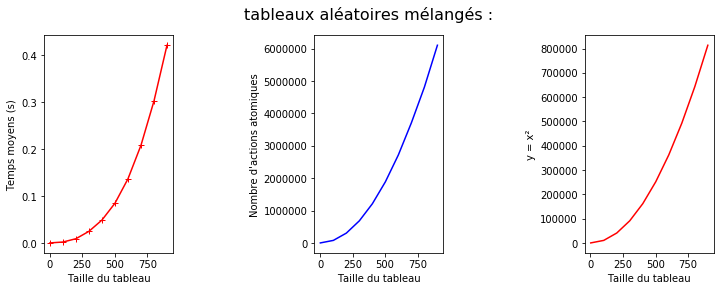

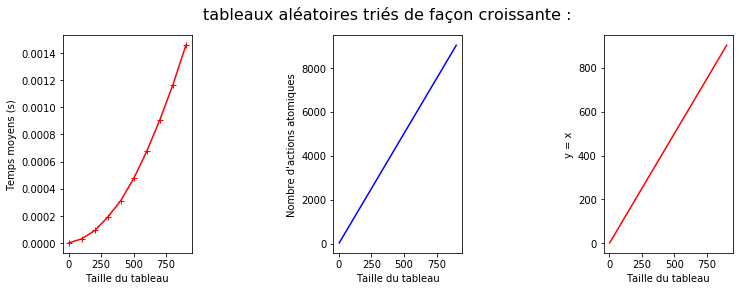

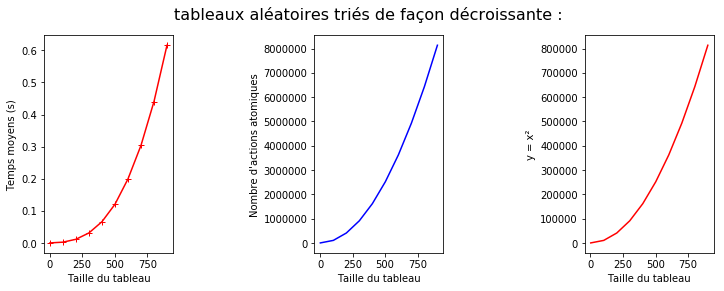

In [3]:
bulle_mel_act_max,bulle_croiss_act_max,bulle_decroiss_act_max,\
bulle_mel_temps_max,bulle_croiss_temps_max,bulle_decroiss_temps_max=resultats(\
"bulle","melange","quadratique","croissant","lineaire","decroissant","quadratique")

<u><b>Conclusions sur le tri bulle : </b></u><br/>
La courbe des résultats empiriques (mesure des temps moyens en fonction des tailles des tableaux), présente la même forme que la courbe théorique (définie par le nombre d'actions atomiques en fonction des tailles des tableaux).<br/>
Lorsque les tableaux sont déjà triés en ordre croissant, on observe un modèle linéaire ( O(n) ) ; lorsqu'ils sont triès en ordre décroissant, on observe le modèle quadratique.<br/>
<i><u>Ces profils semblent refléter un comportement quadratique (tel que y=x²) : cela confirme que le tri bulle est bien en O(n²).</u></i>

<u><h2> II Le tri sélection : </h2></u>
<u><b>Principe : </b></u><br/>
Le principe du tri par sélection/échange (ou tri par extraction) est d'aller chercher le plus petit élément du vecteur pour le mettre en premier, puis de repartir du second élément et d'aller chercher le plus petit élément du vecteur pour le mettre en second, etc...<br/>
<u><b>Complexité : </b></u><br/>
...<br/>
<u><b>Complexité dans le pire cas : </b></u><br/>
...<br/>
<u><b>Complexité dans le cas facile : </b></u><br/>
...<br/>
<u><b>Explication des jeux de tests présents dans le script : </b></u><br/>
1) un test de precondition : Tous les éléments du tableau doivent être des nombres<br/>
2) un test de postcondition : Le tableau final doit être trié<br/>
...<br/>
<u><b>Script : </b></u><br/>
<u>Référence : </u> http://lwh.free.fr/pages/algo/tri/tri_selection.html <br/>

In [4]:
def tri_selection(tableau,Nb_Action_atom):
    longueur_tab=len(tableau)
    for k in range(longueur_tab):
        element=tableau[k]
        typ_element=type(element)
        assert(typ_element!=str),"Tous les éléments du tableau doivent être des nombres" # Pré-condition
    #assert(type(tableau[k] for k in range(longueur_tab)) == int),"Tous les éléments du tableau doivent être des nombres entiers" # Pré-condition
    for en_cours in range(0,longueur_tab):  
        Nb_Action_atom=Nb_Action_atom+1
        plus_petit = en_cours
        for j in range(en_cours+1,longueur_tab) :
            Nb_Action_atom=Nb_Action_atom+1
            if tableau[j] < tableau[plus_petit] :
                plus_petit = j
        if plus_petit>en_cours:
            Nb_Action_atom=Nb_Action_atom+1
            temp = tableau[en_cours]
            tableau[en_cours] = tableau[plus_petit]
            tableau[plus_petit] = temp
    return tableau,Nb_Action_atom
Nb_Action_atom=0
liste_initiale=[12,4,7,20,3,9]
print("\nvoici la liste : ",liste_initiale)
liste_triee,Nb_Action_atom=tri_selection(liste_initiale,Nb_Action_atom)

for k in range(len(liste_triee)-1):
    i,j=liste_triee[k],liste_triee[k+1]
    assert(i<j),"Au final, le tableau doit être trié" # Post-condition

print("\nvoici la même liste triée: ",liste_triee)
print("\nNombre d'action atomique effectuées : ",Nb_Action_atom)


voici la liste :  [12, 4, 7, 20, 3, 9]

voici la même liste triée:  [3, 4, 7, 9, 12, 20]

Nombre d'action atomique effectuées :  23


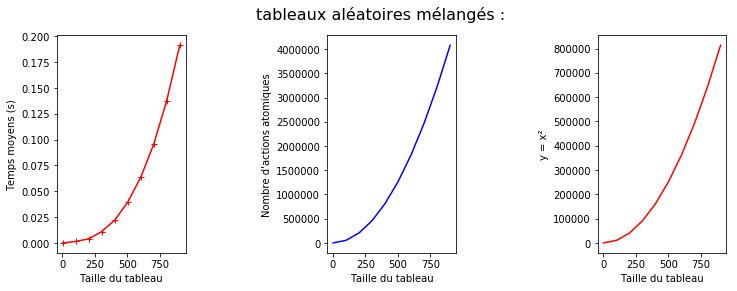

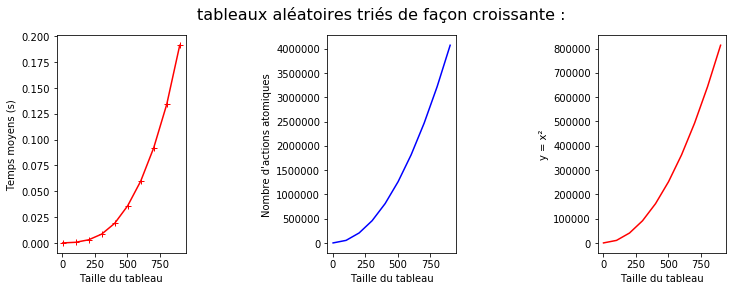

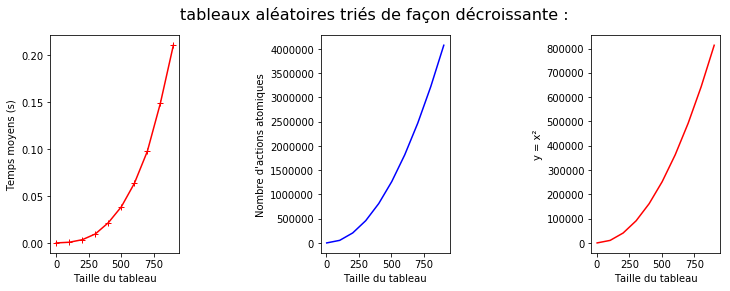

In [5]:
selection_mel_act_max,selection_croiss_act_max,selection_decroiss_act_max,\
selection_mel_temps_max,selection_croiss_temps_max,selection_decroiss_temps_max=resultats(\
"selection","melange","quadratique","croissant","quadratique","decroissant","quadratique")

<u><b>Conclusions sur le tri sélection : </b></u><br/>
La courbe des résultats empiriques (mesure des temps moyens en fonction des tailles des tableaux), présente la même forme que la courbe théorique (définie par le nombre d'actions atomiques en fonction des tailles des tableaux).<br/>
Lorsque les tableaux sont déjà triés en ordre croissant, ou bien lorsqu'ils sont triès en ordre décroissant, on observe le même profil : un modèle quadratique.<br/>
<i><u>Ces profils semblent refléter un comportement quadratique (tel que y=x²) : cela confirme que le tri sélection est bien en O(n²).</u></i><br/>
<i>A ce stade de l'étude, on peut tout de même observer que dans les pires cas, <b>le tri par sélection est plus rapide</b> (en temps et en nombre d'actions atomiques) <b>que le tri bulle.</b></i>

<u><h2> III Le tri rapide (non récursif) : </h2></u>
<u><b>Principe : </b></u><br/>
...<br/>
<u><b>Complexité : </b></u><br/>
...<br/>
<u><b>Complexité dans le pire cas : </b></u><br/>
...<br/>
<u><b>Complexité dans le cas facile : </b></u><br/>
...<br/>
<u><b>Explication des jeux de tests présents dans le script : </b></u><br/>
1) un test de precondition : Tous les éléments du tableau doivent être des nombres<br/>
2) un test de postcondition : Le tableau final doit être trié<br/>
...<br/>
<u><b>Script : </b></u><br/>
<u>Référence du tri rapide <b>RECURSIF</b> : </u> http://lwh.free.fr/pages/algo/tri/tri_rapide.html <br/>
<u>Référence du tri rapide <b>Non RECURSIF</b> : </u> https://www.geeksforgeeks.org/python-program-for-iterative-quick-sort/ <br/>




In [6]:
def partition(tableau,partie_basse,partie_haute,Nb_Action_atom):
    Nb_Action_atom=Nb_Action_atom+1
    i = ( partie_basse - 1 )
    x = tableau[partie_haute]
    for j in range(partie_basse , partie_haute):
        Nb_Action_atom=Nb_Action_atom+1
        if tableau[j]<=x:
            i = i+1
            tableau[i],tableau[j]= tableau[j],tableau[i]
            #print("tableau inversion1 = ",tableau)
            #rien=input("pause")
    tableau[i+1],tableau[partie_haute] = tableau[partie_haute],tableau[i+1] #inversion
    #print("tableau inversion2 = ",tableau)
    #rien=input("pause")
    return (i+1),Nb_Action_atom 

# Function to do Quick sort 
# tableau[] --> tableauay to be sorted, 
# partie_basse --> Starting index, 
# partie_haute --> Ending index 
def quickSortIterative(tableau,partie_basse,partie_haute,Nb_Action_atom): 
    Nb_Action_atom=Nb_Action_atom+1
    # Create an auxiliary Nouvelle_liste 
    taille = partie_haute - partie_basse + 1
    #print("taille = ",taille)
    Nouvelle_liste = [0] * (taille) 
    #print("Nouvelle_liste = ",Nouvelle_liste)

    # initialize top of Nouvelle_liste 
    top = -1

    # push initial values of partie_basse and partie_haute to Nouvelle_liste 
    top = top + 1
    #print("top = ",top)
    #az=len(Nouvelle_liste)
    #print("taille nouvelle liste = ",az)
    #rien=input("pause")
    Nouvelle_liste[top] = partie_basse 
    top = top + 1
    Nouvelle_liste[top] = partie_haute 

    # Keep popping from Nouvelle_liste while is not empty 
    while top >= 0: 
        Nb_Action_atom=Nb_Action_atom+1
        # Pop partie_haute and partie_basse 
        partie_haute = Nouvelle_liste[top] 
        top = top - 1
        partie_basse = Nouvelle_liste[top] 
        top = top - 1

        # Set pivot element at its correct position in 
        # sorted tableauay 
        p,Nb_Action_atom = partition( tableau, partie_basse, partie_haute,Nb_Action_atom ) 

        # If there are elements on left side of pivot, 
        # then push left side to Nouvelle_liste 
        if p-1 > partie_basse: 
            top = top + 1
            Nouvelle_liste[top] = partie_basse 
            top = top + 1
            Nouvelle_liste[top] = p - 1

        # If there are elements on right side of pivot, 
        # then push right side to Nouvelle_liste 
        if p+1 < partie_haute: 
            top = top + 1
            Nouvelle_liste[top] = p + 1
            top = top + 1
            Nouvelle_liste[top] = partie_haute 
    return tableau,Nb_Action_atom



Nb_Action_atom=0
liste_initiale=[8,7,6,5,4,3,2,1]
print("\nvoici la liste : ",liste_initiale)
Longueur_tab = len(liste_initiale)
liste_triee,Nb_Action_atom=quickSortIterative(liste_initiale,0,Longueur_tab-1,Nb_Action_atom)

#for k in range(len(liste_triee)-1):
#    i,j=liste_triee[k],liste_triee[k+1]
#    assert(i<j),"Au final, le tableau doit être trié" # Post-condition

print("\nvoici la même liste triée: ",liste_triee)
print("\nNombre d'action atomique effectuées : ",Nb_Action_atom)


voici la liste :  [8, 7, 6, 5, 4, 3, 2, 1]

voici la même liste triée:  [1, 2, 3, 4, 5, 6, 7, 8]

Nombre d'action atomique effectuées :  43


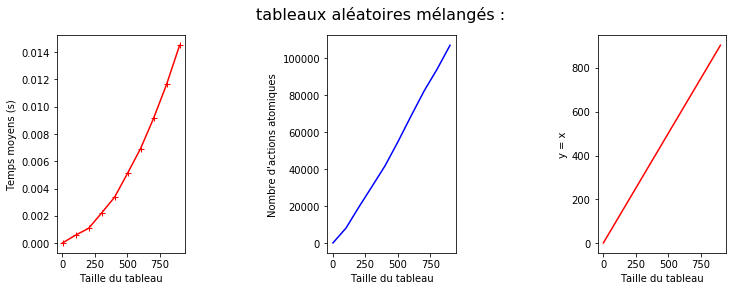

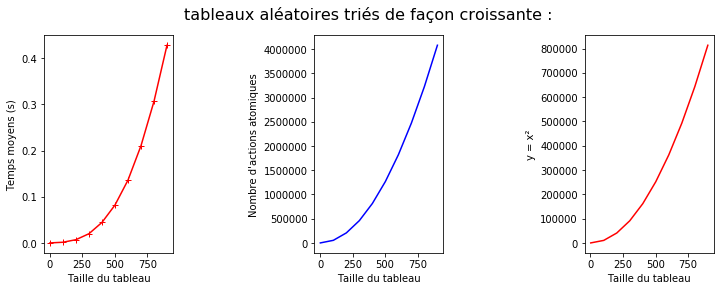

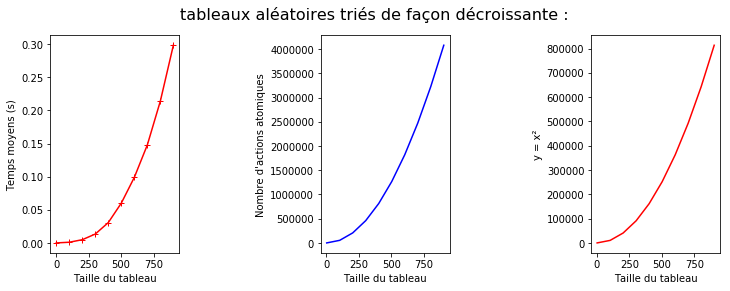

In [7]:
rapide_mel_act_max,rapide_croiss_act_max,rapide_decroiss_act_max,\
rapide_mel_temps_max,rapide_croiss_temps_max,rapide_decroiss_temps_max=resultats(\
"rapide","melange","lineaire","croissant","quadratique","decroissant","quadratique")


<u><h2> IV Le tri natif de python : </h2></u>
<u><b>Principe : </b></u><br/>
...<br/>
<u><b>Complexité : </b></u><br/>
...<br/>
<u><b>Complexité dans le pire cas : </b></u><br/>
...<br/>
<u><b>Complexité dans le cas facile : </b></u><br/>
...<br/>
<u><b>Explication des jeux de tests présents dans le script : </b></u><br/>

2) un test de postcondition : Le tableau final doit être trié<br/>
...<br/>
<u><b>Script : </b></u><br/>
<u>Référence : </u> https://docs.python.org/fr/3/library/stdtypes.html#list.sort <br/>

In [8]:
def tri_natif_python(tableau,Nb_Action_atom):
    tableau.sort()
    return tableau,Nb_Action_atom
Nb_Action_atom=0
liste_initiale=[12,4,7,20,3,9]
print("\nvoici la liste : ",liste_initiale)
liste_triee,Nb_Action_atom=tri_natif_python(liste_initiale,Nb_Action_atom)

for k in range(len(liste_triee)-1):
    i,j=liste_triee[k],liste_triee[k+1]
    assert(i<j),"Au final, le tableau doit être trié" # Post-condition

print("\nvoici la même liste triée: ",liste_triee)
print("\nNombre d'action atomique effectuées : ",Nb_Action_atom)


voici la liste :  [12, 4, 7, 20, 3, 9]

voici la même liste triée:  [3, 4, 7, 9, 12, 20]

Nombre d'action atomique effectuées :  0


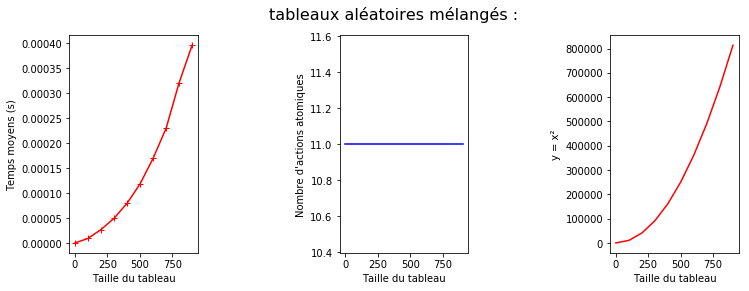

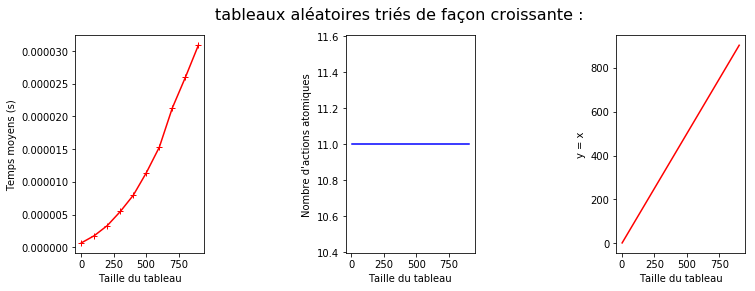

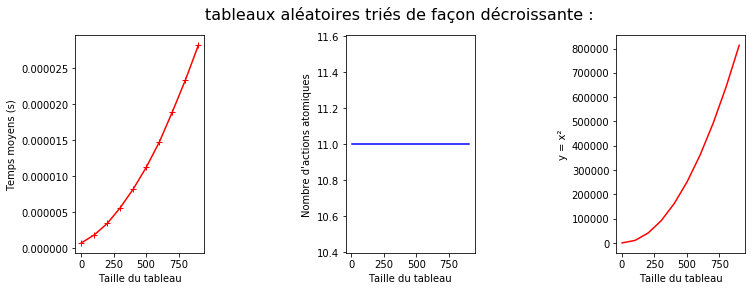

In [11]:
natif_mel_act_max,natif_croiss_act_max,natif_decroiss_act_max,\
natif_mel_temps_max,natif_croiss_temps_max,natif_decroiss_temps_max=resultats(\
"natif_python","melange","quadratique","croissant","lineaire","decroissant","quadratique")

<u><b>Conclusions sur le tri natif de Python : </b></u><br/>
Que les tableaux soient mélangés, déjà triés en ordre croissant, ou bien triès en ordre décroissant, on observe souvent le même profil : un modèle quadratique.<br/>
<i><u>On serait en O(n²).</u></i><br/>
A de rares occasions, en relançant l'obtention d'un autre tableau aléatoire, je pouvais observer soit un quasi-modèle linéaire, soit une sorte de sigmoïde.<br/>
<i>Par ailleurs, on peut observer que dans tous les cas, <b>le tri natif de Python est nettement plus rapide</b> (en temps) <b>que tous les autres tris.</b></i>

In [12]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

<u><h2> V Comparaison des différents tris : </h2></u>

In [20]:
import pandas as pd
Donnees_Actions = {'..."Nb. actions atomiques"...':[' Tri bulle', 'Tri selection', 'Tri rapide non récursif', 'Tri natif Python'],
        'Tableau mélangé':[bulle_mel_act_max, selection_mel_act_max, rapide_mel_act_max, natif_mel_act_max],
        'Tableau croissant':[bulle_croiss_act_max, selection_croiss_act_max, rapide_croiss_act_max, natif_croiss_act_max],
        'Tableau décroissant': [bulle_decroiss_act_max, selection_decroiss_act_max, rapide_decroiss_act_max, natif_decroiss_act_max]}
df = pd.DataFrame(Donnees_Actions)
print("""Comparaison des nombres d'actions atomiques obtenus 
par les différents tris en fonction de l'état mélangé ou ordonné
du tableau initial pour n=1000 :""")
df

Comparaison des nombres d'actions atomiques obtenus 
par les différents tris en fonction de l'état mélangé ou ordonné
du tableau initial pour n=1000 :


,"...""Nb. actions atomiques""...",Tableau mélangé,Tableau croissant,Tableau décroissant
0,Tri bulle,6108838,9031,8136051
1,Tri selection,4081501,4072541,4077051
2,Tri rapide non récursif,107161,4081551,4081551
3,Tri natif Python,11,11,11


<i>Sans accès au script du tri natif de Python, on ne peut compter d'actions atomiques.</i><br/><br/>
Il apparait pour les <u>tableaux mélangés</u> que le <b><i>tri rapide non récursif</i></b> est le <b><i>plus rapide en nombre d'actions atomiques</i></b>.<br/><br/>
Etonnament, lorsque le tableau est déjà <u>classé de façon croissante</u>, c'est le <b><i>tri bulle</i></b> qui devient le <b><i>plus rapide en nombre d'actions atomiques</i></b>.<br/><br/>
Dans le pire cas, lorsque le tableau est <u>classé de façon décroissante</u>, c'est le <b><i>tri bulle</i></b> qui est à nouveau le <b><i>plus lent en nombre d'actions atomiques</i></b>.

In [21]:
import pandas as pd
Donnees_Temps = {'..."Temps"...':[' Tri bulle', 'Tri selection', 'Tri rapide non récursif', 'Tri natif Python'],
        'Tableau mélangé':[bulle_mel_temps_max, selection_mel_temps_max, rapide_mel_temps_max, natif_mel_temps_max],
        'Tableau croissant':[bulle_croiss_temps_max, selection_croiss_temps_max, rapide_croiss_temps_max, natif_croiss_temps_max],
        'Tableau décroissant': [bulle_decroiss_temps_max, selection_decroiss_temps_max, rapide_decroiss_temps_max, natif_decroiss_temps_max]}
dt = pd.DataFrame(Donnees_Temps)
print("""Comparaison des temps obtenus par les différents
tris en fonction de l'état mélangé ou ordonné du 
tableau initial pour n=1000 :""")
dt

Comparaison des temps obtenus par les différents
tris en fonction de l'état mélangé ou ordonné du 
tableau initial pour n=1000 :


,"...""Temps""...",Tableau mélangé,Tableau croissant,Tableau décroissant
0,Tri bulle,0.421706,0.001456,0.615941
1,Tri selection,0.191450,0.191259,0.210907
2,Tri rapide non récursif,0.014512,0.428141,0.298429
3,Tri natif Python,0.000396,0.000031,0.000028


<i>Sans avoir accès au script du tri natif de Python, on  peut tout de même mesurer un temps.</i><br/><br/>
Il apparait pour les <u>tableaux mélangés</u> que le <b><i>tri natif de Python</i></b> est le <b><i>plus rapide en terme de temps</i></b>, puis suivent respectivement les tris rapide, sélection et bulle.<br/><br/>
Etonnament, lorsque le tableau est déjà <u>classé de façon croissante</u>, bien que le <b><i>tri natif soit toujours le plus rapide</i></b>,c'est encore le <b><i>tri bulle</i></b> qui devient le <b><i>plus rapide en terme de temps</i></b> sur les tris restants, avec un ordre qui s'inverse : le tri sélection passant devant le tri rapide.<br/><br/>
Dans le pire cas, lorsque le tableau est <u>classé de façon décroissante</u>, c'est toujours le <b><i>tri natif</i></b> qui est le <b><i>plus rapide</i></b> en terme de temps, suivi respectivement par les tri sélection, rapide et bulle (soit dans le même ordre que ce qui était observé en terme d'actions atomiques).